<a href="https://colab.research.google.com/github/elyakoubibouchra/elyakoubibouchra/blob/main/diabetes-classification-nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        """
        Initialize Adam optimizer with hyperparameters.
        """
        assert isinstance(learning_rate, (int, float)) and learning_rate > 0, "Learning rate must be a positive number"
        assert 0 <= beta1 < 1, "beta1 must be in [0, 1)"
        assert 0 <= beta2 < 1, "beta2 must be in [0, 1)"
        assert epsilon > 0, "epsilon must be positive"

        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m_weights = None
        self.v_weights = None
        self.m_biases = None
        self.v_biases = None
        self.t = 0  # Time step

    def initialize(self, weights, biases):
        """
        Initialize moment estimates for weights and biases.
        """
        self.m_weights = [np.zeros_like(w) for w in weights]
        self.v_weights = [np.zeros_like(w) for w in weights]
        self.m_biases = [np.zeros_like(b) for b in biases]
        self.v_biases = [np.zeros_like(b) for b in biases]

    def update(self, weights, biases, d_weights, d_biases):
        """
        Update weights and biases using Adam optimization.
        """
        assert self.m_weights is not None, "Optimizer must be initialized before updating"
        assert len(weights) == len(d_weights) == len(self.m_weights) == len(self.v_weights), "Weight dimensions mismatch"
        assert len(biases) == len(d_biases) == len(self.m_biases) == len(self.v_biases), "Bias dimensions mismatch"

        self.t += 1  # Increment time step
        new_weights = [w.copy() for w in weights]
        new_biases = [b.copy() for b in biases]

        for i in range(len(weights)):
            # Update moving averages for weights
            self.m_weights[i] = self.beta1 * self.m_weights[i] + (1 - self.beta1) * d_weights[i]
            self.v_weights[i] = self.beta2 * self.v_weights[i] + (1 - self.beta2) * (d_weights[i] ** 2)

            # Bias-corrected moments
            m_hat = self.m_weights[i] / (1 - self.beta1 ** self.t)
            v_hat = self.v_weights[i] / (1 - self.beta2 ** self.t)

            # Update weights
            new_weights[i] -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

            # Update moving averages for biases
            self.m_biases[i] = self.beta1 * self.m_biases[i] + (1 - self.beta1) * d_biases[i]
            self.v_biases[i] = self.beta2 * self.v_biases[i] + (1 - self.beta2) * (d_biases[i] ** 2)

            # Bias-corrected moments
            m_hat_b = self.m_biases[i] / (1 - self.beta1 ** self.t)
            v_hat_b = self.v_biases[i] / (1 - self.beta2 ** self.t)

            # Update biases
            new_biases[i] -= self.learning_rate * m_hat_b / (np.sqrt(v_hat_b) + self.epsilon)

        return new_weights, new_biases

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3407 - loss: 0.8487 - val_accuracy: 0.4074 - val_loss: 0.7517
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4256 - loss: 0.7573 - val_accuracy: 0.4741 - val_loss: 0.7027
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4865 - loss: 0.7231 - val_accuracy: 0.5556 - val_loss: 0.6698
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5456 - loss: 0.6977 - val_accuracy: 0.6074 - val_loss: 0.6423
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6013 - loss: 0.6589 - val_accuracy: 0.6815 - val_loss: 0.6197
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6652 - loss: 0.6287 - val_accuracy: 0.7333 - val_loss: 0.5985
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6813 - loss: 0.6192 - val_accuracy: 0.7556 - val_loss: 0.5796
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6814 - loss: 0.5989 - val_accuracy: 0.7704 - val_loss: 0.

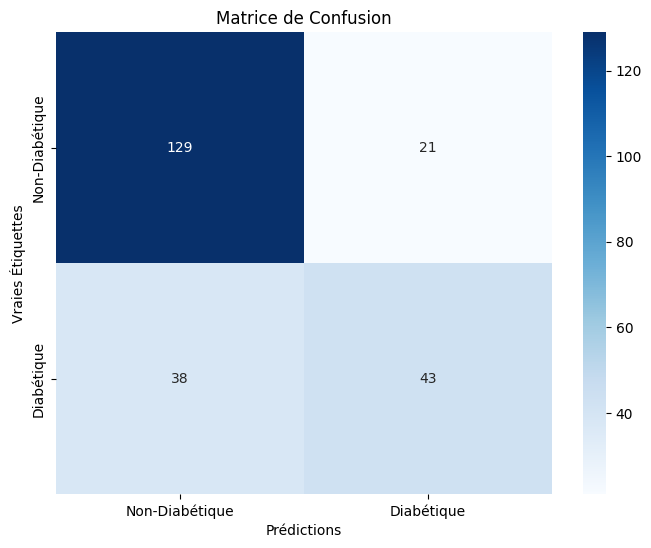

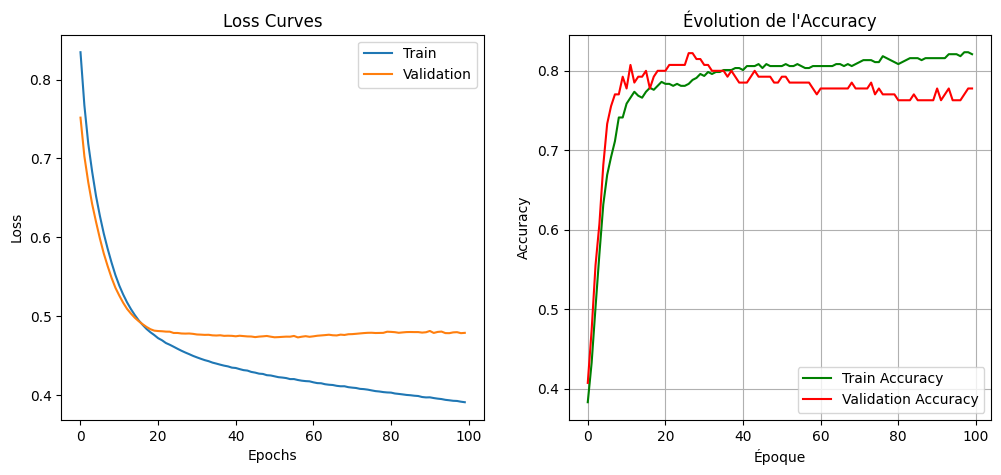

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data preprocessing (X, y, train/val/test split) is already done
# Create the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile with Adam optimizer and L2 regularization
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)

# Predictions and evaluation
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nRapport de classification (Test set):")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabétique', 'Diabétique'], yticklabels=['Non-Diabétique', 'Diabétique'])
plt.title('Matrice de Confusion')
plt.ylabel('Vraies Étiquettes')
plt.xlabel('Prédictions')
plt.show()

# Plot loss and accuracy curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Loss curves
ax1.plot(history.history['loss'], label='Train')
ax1.plot(history.history['val_loss'], label='Validation')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Loss Curves')
ax1.legend()

# Accuracy curves
ax2.plot(history.history['accuracy'], label='Train Accuracy', color='green')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
ax2.set_title('Évolution de l\'Accuracy')
ax2.set_xlabel('Époque')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

plt.show()